In [5]:
import pandas as pd
df = pd.read_excel("online_retail.xlsx")

In [13]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [14]:
df.shape

(536641, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


In [17]:
# Count missing values and calculate percentage
missing_data = df.isnull().sum().to_frame('Missing Count')
missing_data['Missing %'] = (df.isnull().sum() / len(df)) * 100
missing_data

,Missing Count,Missing %
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.270945
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135037,25.163377
Country,0,0.000000


In [23]:
df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID'])
df['Description'] = df['Description'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [24]:
# Check missing values again
missing_data = df.isnull().sum().to_frame('Missing Count')
missing_data['Missing %'] = (df.isnull().sum() / len(df)) * 100
missing_data

,Missing Count,Missing %
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


In [25]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [26]:
# Keep only valid transactions (positive Quantity & UnitPrice)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [27]:
# Check missing values again
missing_data = df.isnull().sum().to_frame('Missing Count')
missing_data['Missing %'] = (df.isnull().sum() / len(df)) * 100
missing_data

,Missing Count,Missing %
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


In [29]:
# Drop rows with NaN values completely
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [31]:
# Define "snapshot date" (the day after the last purchase in the dataset)
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [33]:
# Aggregate data by CustomerID:
# - Recency = Days since last purchase
# - Frequency = Number of unique invoices
# - MonetaryValue = Total spending
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [34]:
# Rename columns for clarity
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [35]:
import numpy as np

# Recency: lower is better (reverse labels -> 10 = best, 1 = worst)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 10, labels=np.arange(10,0,-1)).astype(int)

# Frequency: higher is better (normal labels -> 1 = worst, 10 = best)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 10, labels=np.arange(1,11)).astype(int)

# MonetaryValue: higher is better (normal labels)
rfm["M_Score"] = pd.qcut(rfm["MonetaryValue"], 10, labels=np.arange(1,11)).astype(int)

# Combine RFM scores into a single string
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,10,1110
12347.0,2,7,4310.00,10,9,10,10910
12348.0,75,4,1797.24,4,7,8,478
12349.0,19,1,1757.55,8,1,8,818
12350.0,310,1,334.40,1,1,3,113
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,4,2,142
18281.0,181,1,80.82,2,4,1,241
18282.0,8,2,178.05,9,6,2,962


In [36]:
# Customer Segmentation Function
def segment_customer(row):
    r, f, m = row["R_Score"], row["F_Score"], row["M_Score"]

    # Champions
    if r >= 9 and f >= 9 and m >= 9:
        return "Champions"

    # Loyal Customers
    if r >= 8 and f >= 8:
        return "Loyal Customers"

    # Potential Loyalist
    if r >= 8 and m >= 6:
        return "Potential Loyalist"

    # Recent Users
    if r == 10 and f <= 3 and m <= 3:
        return "Recent Users"

    # Promising
    if 5 <= r <= 6 and 5 <= f <= 6 and 5 <= m <= 6:
        return "Promising"

    # Needs Attention
    if r <= 3 and m >= 7:
        return "Needs Attention"

    # About To Sleep
    if r <= 4 and f <= 4 and m <= 4:
        return "About To Sleep"

    # Price Sensitive
    if r >= 8 and f >= 8 and m <= 3:
        return "Price Sensitive"

    # Can’t Lose Them
    if r <= 3 and f >= 8 and m >= 8:
        return "Can’t Lose Them"

    # Hibernating
    if r <= 2 and f <= 3 and m <= 3:
        return "Hibernating"

    # Lost
    if r == 1 and f == 1 and m == 1:
        return "Lost"

    # Default category
    return "Others"

# Apply segmentation to each customer
rfm["Segment"] = rfm.apply(segment_customer, axis=1)

# Count how many customers in each segment
segment_counts = rfm["Segment"].value_counts()
segment_counts

Segment
Others                2262
About To Sleep         821
Loyal Customers        392
Champions              347
Potential Loyalist     236
Needs Attention        193
Promising               68
Recent Users            19
Name: count, dtype: int64

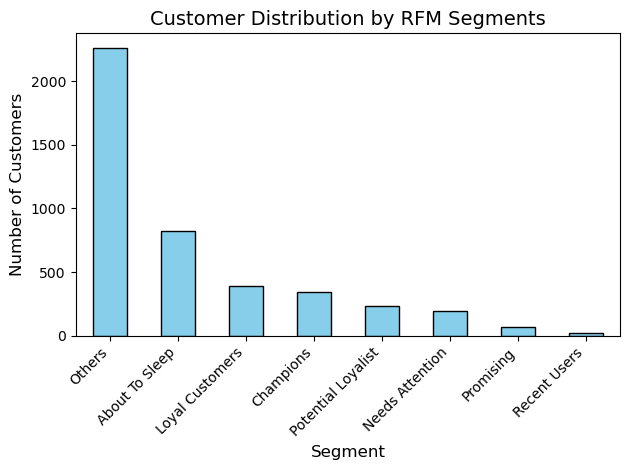

In [37]:
# Visualization in Bar Chart
import matplotlib.pyplot as plt

segment_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.title("Customer Distribution by RFM Segments", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

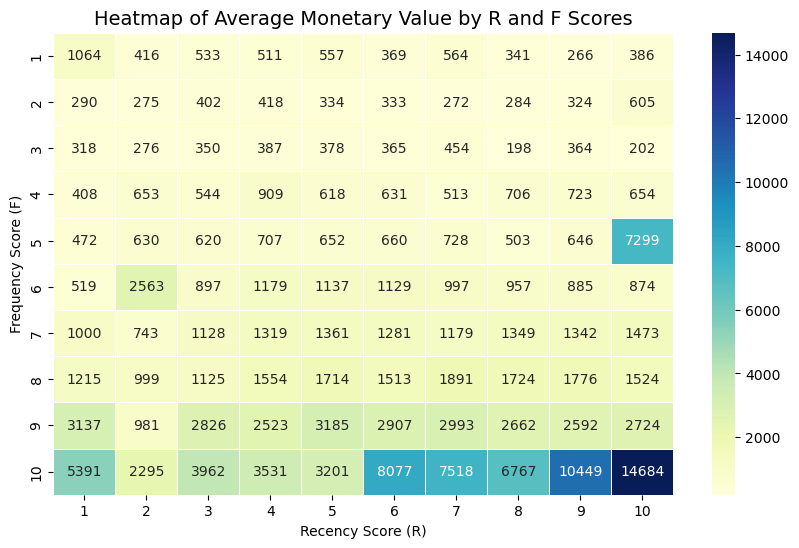

In [39]:
# Visualization in Heat Map
import seaborn as sns
# Create pivot table: R vs F with average M
heatmap_data = rfm.pivot_table(
    index="F_Score", 
    columns="R_Score", 
    values="MonetaryValue", 
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".0f", cmap="YlGnBu", 
    linewidths=.5
)
plt.title("Heatmap of Average Monetary Value by R and F Scores", fontsize=14)
plt.xlabel("Recency Score (R)")
plt.ylabel("Frequency Score (F)")
plt.show()


## Customer Segmentation & Possible Marketing Ideas  

| Segment            | Description                                | Suggested Marketing Idea |
|--------------------|--------------------------------------------|---------------------------|
| **Champions**      | Recent, frequent, and high spenders        | Exclusive rewards, early access to products |
| **Loyal Customers**| Frequent buyers with good recency          | Loyalty programs, personalized recommendations |
| **Potential Loyalist** | Recent and moderate spenders           | Targeted promotions to increase spending |
| **Recent Users**   | New but low spending                       | Welcome offers, onboarding campaigns |
| **Promising**      | Average on all metrics                     | Nurture with regular engagement emails |
| **Needs Attention**| High spenders but inactive                 | Re-engagement campaigns, special discounts |
| **About To Sleep** | Below average on all metrics               | Gentle reminders, win-back offers |
| **Price Sensitive**| Frequent but low spenders                  | Discounts, bundle deals |
| **Can’t Lose Them**| High spenders but inactive                 | Personalized offers, VIP treatment |
| **Hibernating**    | Rarely purchase and inactive               | Seasonal campaigns, awareness marketing |
| **Lost**           | Lowest scores in all metrics               | Low-priority segment, occasional reactivation attempts |
